# Second Iteration: All Stores

This notebook analyzes walmart sales data to uncover key patterns and insights. We will explore seasonal trends, holiday impacts, and predictive analytics for a machine learning model.


# Walmart Sales Data Analysis

## Load Data Loading & Preparation


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/walmart.csv')

# Check for missing values and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


## Data Cleaning & Transformation

Convert date columns to datetime

Convert date columns to datetime


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)

## Sales Over Time

             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874

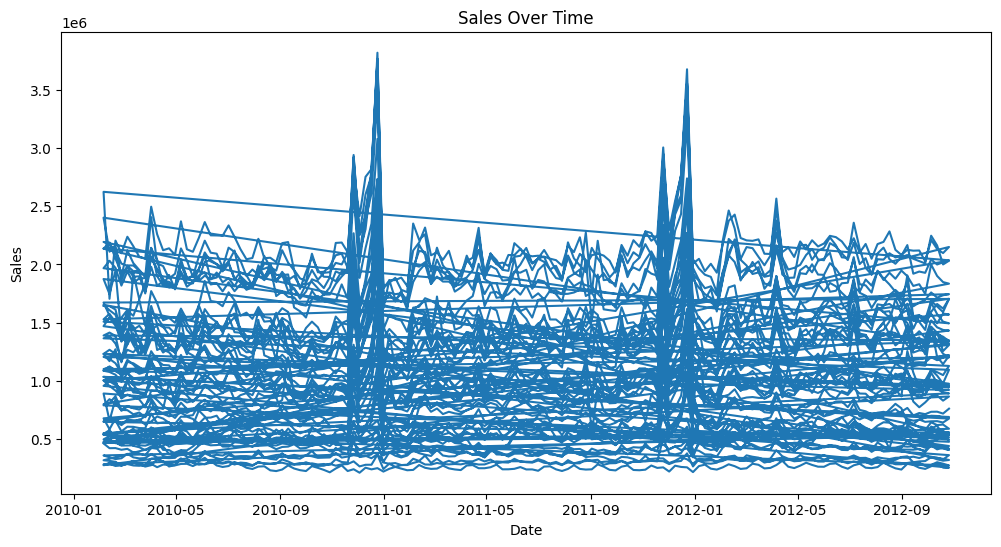

In [8]:
print(df.describe())

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Weekly_Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Holiday vs Regular Sales

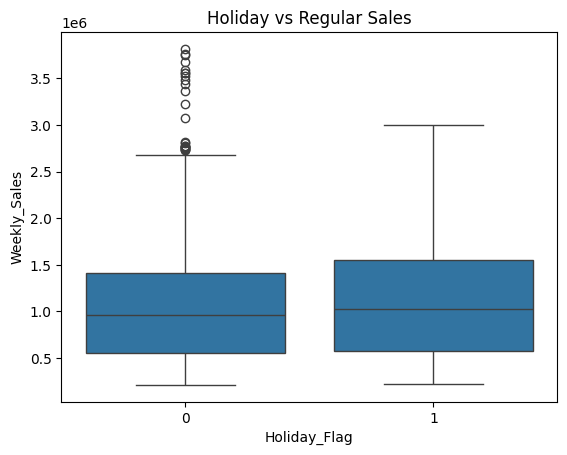

In [13]:
# Boxplot Comparison
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Holiday vs Regular Sales')
plt.show()

## Seasonal & Monthly Patterns


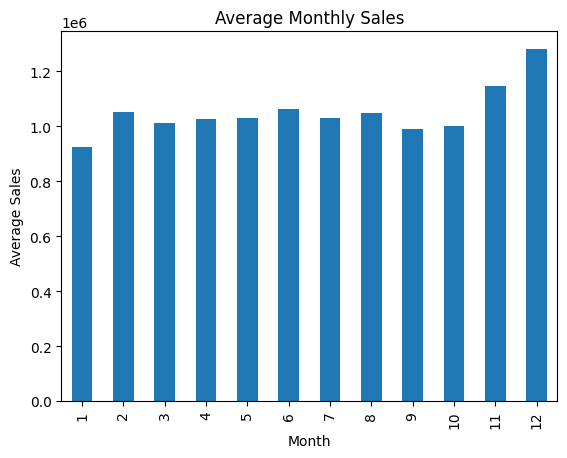

In [10]:
monthly_sales = df.groupby(df['Date'].dt.month)['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

# Statistical Analysis


## Correlation Analysis

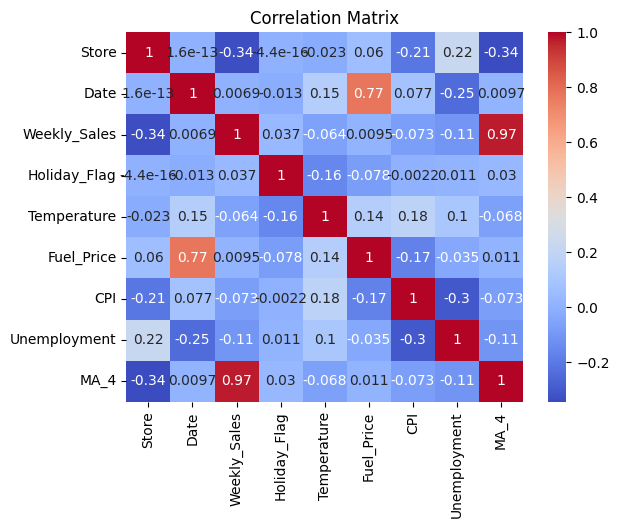

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Rank by Average Sales

In [11]:
top_performers = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print(top_performers.head())

Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64


## Time Series Forecasting

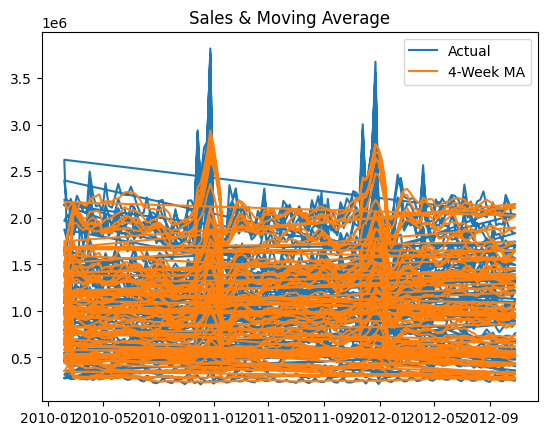

In [12]:
df['MA_4'] = df['Weekly_Sales'].rolling(window=4).mean()
plt.plot(df['Date'], df['Weekly_Sales'], label='Actual')
plt.plot(df['Date'], df['MA_4'], label='4-Week MA')
plt.legend()
plt.title('Sales & Moving Average')
plt.show()